In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
from operator import add

In [32]:
# Altered Swiss

def Match(P, R, W, t):
    # Pairs all of the players according to some function $\Phi$
    eligible = [i for i in range(player_size)]
    if t == 0:
        # randomly assign
        while len(eligible) > 1:
            i = eligible.pop(0)
            j = eligible.pop(np.random.randint(len(eligible)))
            R[t][i] = (j,0)
            R[t][j] = (i,0)
    else:
        # Mutable part based on $\Phi$
        copyW = np.array(W.copy())
        for i in range(int(player_size/2)):
            arr = np.where(copyW == copyW.min())
            arr2 = np.random.choice(arr[0], 2, replace = False)
            i = arr2[0]
            j = arr2[1]
            R[t][i] = (j,0)
            R[t][j] = (i,0)
            copyW[i] = total_time*2
            copyW[j] = total_time*2
            
#             arr = np.where(copyW == copyW.min())
#             i = random.choice(arr[0])
#             print(eligible[i])
#             copyW = np.delete(copyW, i)
#             arr = np.where(copyW == copyW.min())
#             j = random.choice(arr[0])            
#             print(eligible[j])
#             copyW = np.delete(copyW, i)
        # assignment logic 
    return R    
    
def Play(P, R, W, t, A):
    # Decides winner of given pairing
    k = 50
    std = 100
    eligible = [1 for i in range(player_size)]
    for i in range(len(eligible)):
        if eligible[i] != 0:
        # Mutable part based on $\Phi$
            si = P[i]
            j = R[t][i][0]
            sj = P[j]
            diff = si - sj
            exponent = -(diff / std)
            expected = 1/(1 + np.exp(exponent))
            if (A == True and t == 0 and i == 0):
                result = 0
            else:
                result = np.random.binomial(1, expected)
#             P[i] += k * (result - expected)
#             P[j] += k * (expected - result)
            if result == 1:
                lst = list(R[t][i])
                lst[1] = 1
                R[t][i] = tuple(lst)
                W[i] += 1
            else:
                lst = list(R[t][j])
                lst[1] = 1
                R[t][j] = tuple(lst)
                W[j] += 1
            eligible[i] = 0
            eligible[j] = 0
         
    return P, R, W
    
def Iterate(P, R, W, t, A):
    # goes forward one time step and updates Array_of_Results according to Play
    R = Match(P, R, W, t)
    P, R, W = Play(P, R, W, t, A)
    t += 1
    return P, R, W

def Run(skill, player_size, total_time, iters, A):
    # Create array of results (opponent, result) by timestep
    R = [[(0,0) for i in range(player_size)] for j in range(total_time)]
    # Track wins
    W = [0 for i in range(player_size)]
    #calculate expectation
    wins = [0 for i in range(player_size)]
    
    for i in range(iters):
        # generate skills
        skills = np.random.normal(1200,100, player_size)
        skills[0] = skill
        # Populate array of players with skill
        P = [skills[i] for i in range(player_size)]
        time = 0
        R = [[(0,0) for i in range(player_size)] for j in range(total_time)]
        W = [0 for i in range(player_size)]
        while time < total_time:
            P, R, W = Iterate(P, R, W, time, A)
            time += 1
        for j in range(player_size):
            wins[j] += W[j]
    wins = [x / iters for x in wins]
    return P, R, W, wins

In [95]:
#parameters
player_size = 64
total_time = 6
iters = 500

wins = [0]*20
t_wins = [0]*20
for j in range(20):
    skill = 800 + 40 * j
    P, R, W, normal_wins = Run(skill, player_size, total_time, iters, False)
    wins[j] = normal_wins[0]
    P, R, W, throw_wins = Run(skill, player_size, total_time, iters, True)
    t_wins[j] = throw_wins[0]

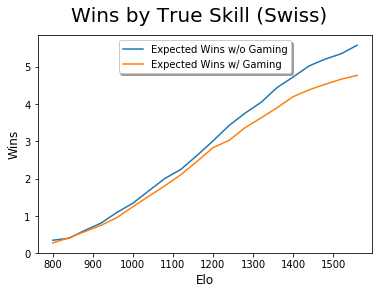

In [96]:
xes = [800 + 40*i for i in range(20)]
plt.plot(xes, wins, label= 'Expected Wins w/o Gaming')
plt.plot(xes, t_wins, label= 'Expected Wins w/ Gaming')
legend = plt.legend(loc='upper center', shadow = True, fontsize='medium')
plt.suptitle('Wins by True Skill (Swiss)', fontsize=20)
plt.xlabel('Elo', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.savefig('plot_for_skill_swiss.jpg')

In [69]:
#parameters
player_size = 2**12
total_time = 12
iters = 5

wins = [0]*6
t_wins = [0]*6
for j in range(6):
    P, R, W, normal_wins = Run(1200, player_size, total_time, iters, False)
    wins[j] = normal_wins[0]
    P, R, W, throw_wins = Run(1200, player_size, total_time, iters, True)
    t_wins[j] = throw_wins[0]

print(np.mean(wins))
print(np.mean(t_wins))

6.066666666666667
5.933333333333334


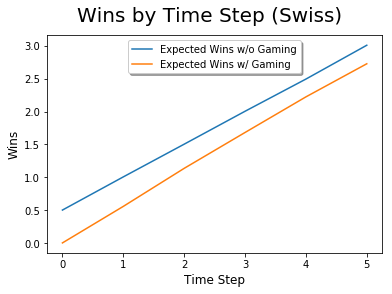

In [68]:
xes = [i for i in range(6)]
wins = [0.5, 1.005, 1.503, 2.004, 2.494, 3.009]
t_wins = [0, 0.556, 1.135, 1.681, 2.223, 2.727]
plt.plot(xes, wins, label= 'Expected Wins w/o Gaming')
plt.plot(xes, t_wins, label= 'Expected Wins w/ Gaming')
legend = plt.legend(loc='upper center', shadow=True, fontsize='medium')
plt.suptitle('Wins by Time Step (Swiss)', fontsize=20)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.savefig('plot_for_time_swiss.jpg')

In [70]:
# Altered Greedy

def Greedy_Match(P, R, W, t):
    # Pairs all of the players according to some function $\Phi$
    eligible = [i for i in range(player_size)]
    if t == 0:
        # randomly assign
        while len(eligible) > 1:
            i = eligible.pop(0)
            j = eligible.pop(np.random.randint(len(eligible)))
            R[t][i] = (j,0)
            R[t][j] = (i,0)
    else:
        # Mutable part based on $\Phi$
        slice_R = R[t-1].copy()
        for i in range(int(player_size/2)):
            m = min(slice_R, key = lambda t: t[1])
            arr = [x for x, y in enumerate(slice_R) if y[1] == m[1]]
            arr2 = np.random.choice(arr, 2, replace = False)
            i = arr2[0]
            j = arr2[1]
            R[t][i] = (j,0)
            R[t][j] = (i,0)
            lst = list(slice_R[i])
            lst[1] = 2
            slice_R[i] = tuple(lst)
            lst = list(slice_R[j])
            lst[1] = 2
            slice_R[j] = tuple(lst)
#         for i in range(int(player_size/2)):
#             m = min(copyR[t - 1], key = lambda t: t[1])
#             arr = [x for x, y in enumerate(copyR[t - 1]) if y[1] == m[1]]
#             arr2 = np.random.choice(arr, 2, replace = False)
#             print(len(arr))
#             i = arr2[0]
#             j = arr2[1]
#             R[t][i] = (j,0)
#             R[t][j] = (i,0)
#             lst = list(copyR[t][i])
#             lst[1] = 2
#             copyR[t][i] = tuple(lst)
#             lst = list(copyR[t][j])
#             lst[1] = 2
#             copyR[t][j] = tuple(lst)
    return R    
    
def Greedy_Play(P, R, W, t, A):
    # Decides winner of given pairing
    k = 50
    std = 100
    eligible = [1 for i in range(player_size)]
    for i in range(len(eligible)):
        if eligible[i] != 0:
        # Mutable part based on $\Phi$
            si = P[i]
            j = R[t][i][0]
            sj = P[j]
            diff = si - sj
            exponent = -(diff / std)
            expected = 1/(1 + np.exp(exponent))
            if (A == True and t == 0 and i == 0):
                result = 0
            else:
                result = np.random.binomial(1, expected)
#             P[i] += k * (result - expected)
#             P[j] += k * (expected - result)
            if result == 1:
                lst = list(R[t][i])
                lst[1] = 1
                R[t][i] = tuple(lst)
                W[i] += 1
            else:
                lst = list(R[t][j])
                lst[1] = 1
                R[t][j] = tuple(lst)
                W[j] += 1
            eligible[i] = 0
            eligible[j] = 0
         
    return P, R, W
    
def Greedy_Iterate(P, R, W, t, A):
    # goes forward one time step and updates Array_of_Results according to Play
    R = Greedy_Match(P, R, W, t)
    P, R, W = Greedy_Play(P, R, W, t, A)
    t += 1
    return P, R, W

def Greedy_Run(skill, player_size, total_time, iters, A):
    # Create array of results (opponent, result) by timestep
    R = [[(0,0) for i in range(player_size)] for j in range(total_time)]
    # Track wins
    W = [0 for i in range(player_size)]
    #calculate expectation
    wins = [0 for i in range(player_size)]
    
    for i in range(iters):
        # generate skills
        skills = np.random.normal(1200,100, player_size)
        skills[0] = skill
        # Populate array of players with skill
        P = [skills[i] for i in range(player_size)]
        time = 0
        R = [[(0,0) for i in range(player_size)] for j in range(total_time)]
        W = [0 for i in range(player_size)]
        while time < total_time:
            P, R, W = Greedy_Iterate(P, R, W, time, A)
            time += 1
        for j in range(player_size):
            wins[j] += W[j]
    wins = [x / iters for x in wins]
    return P, R, W, wins

In [92]:
#parameters
player_size = 64
total_time = 3
iters = 100

wins = [0]*total_time
t_wins = [0]*total_time
for j in range(total_time):
    P, R, W, normal_wins = Greedy_Run(1200, player_size, total_time, iters, False)
    wins[j] = normal_wins[0]
    P, R, W, throw_wins = Greedy_Run(1200, player_size, total_time, iters, True)
    t_wins[j] = throw_wins[0]

print(np.mean(wins))
print(np.mean(t_wins))

1.4733333333333334
1.0933333333333333


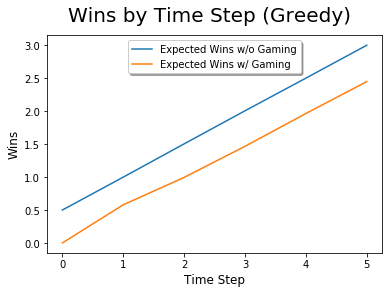

In [93]:
wins = [0.5, 0.999, 1.504, 2.006, 2.502, 3.001]
t_wins = [0, 0.579, 0.995, 1.467, 1.965, 2.449]
xes = [i for i in range(6)]
plt.plot(xes, wins, label= 'Expected Wins w/o Gaming')
plt.plot(xes, t_wins, label= 'Expected Wins w/ Gaming')
legend = plt.legend(loc='upper center', shadow=True, fontsize='medium')
plt.suptitle('Wins by Time Step (Greedy)', fontsize=20)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.savefig('plot_for_time_greedy.jpg')

In [1]:
# Altered Naive

def Naive_Match(P, R, W, t):
    # Pairs all of the players according to some function $\Phi$
    eligible = [i for i in range(player_size)]
    if t == 0:
        # randomly assign
        while len(eligible) > 1:
            i = eligible.pop(0)
            j = eligible.pop(np.random.randint(len(eligible)))
            R[t][i] = (j,0)
            R[t][j] = (i,0)
    else:
        # Mutable part based on $\Phi$
        slice_R = R[0].copy()
        for i in range(int(player_size/2)):
            m = min(slice_R, key = lambda t: t[1])
            arr = [x for x, y in enumerate(slice_R) if y[1] == m[1]]
            arr2 = np.random.choice(arr, 2, replace = False)
            i = arr2[0]
            j = arr2[1]
            R[t][i] = (j,0)
            R[t][j] = (i,0)
            lst = list(slice_R[i])
            lst[1] = 2
            slice_R[i] = tuple(lst)
            lst = list(slice_R[j])
            lst[1] = 2
            slice_R[j] = tuple(lst)
    return R    
    
def Naive_Play(P, R, W, t, A):
    # Decides winner of given pairing
    k = 50
    std = 100
    eligible = [1 for i in range(player_size)]
    for i in range(len(eligible)):
        if eligible[i] != 0:
        # Mutable part based on $\Phi$
            si = P[i]
            j = R[t][i][0]
            sj = P[j]
            diff = si - sj
            exponent = -(diff / std)
            expected = 1/(1 + np.exp(exponent))
            if (A == True and t == 0 and i == 0):
                result = 0
            else:
                result = np.random.binomial(1, expected)
            P[i] += k * (result - expected)
            P[j] += k * (expected - result)
            if result == 1:
                lst = list(R[t][i])
                lst[1] = 1
                R[t][i] = tuple(lst)
                W[i] += 1
            else:
                lst = list(R[t][j])
                lst[1] = 1
                R[t][j] = tuple(lst)
                W[j] += 1
            eligible[i] = 0
            eligible[j] = 0
         
    return P, R, W
    
def Naive_Iterate(P, R, W, t, A):
    # goes forward one time step and updates Array_of_Results according to Play
    R = Naive_Match(P, R, W, t)
    P, R, W = Naive_Play(P, R, W, t, A)
    t += 1
    return P, R, W

def Naive_Run(skill, player_size, total_time, iters, A):
    # Create array of results (opponent, result) by timestep
    R = [[(0,0) for i in range(player_size)] for j in range(total_time)]
    # Track wins
    W = [0 for i in range(player_size)]
    #calculate expectation
    wins = [0 for i in range(player_size)]
    
    for i in range(iters):
        # generate skills
        skills = np.random.normal(1200,100, player_size)
        skills[0] = skill
        # Populate array of players with skill
        P = [skills[i] for i in range(player_size)]
        time = 0
        R = [[(0,0) for i in range(player_size)] for j in range(total_time)]
        W = [0 for i in range(player_size)]
        while time < total_time:
            P, R, W = Naive_Iterate(P, R, W, time, A)
            time += 1
        for j in range(player_size):
            wins[j] += W[j]
    wins = [x / iters for x in wins]
    return P, R, W, wins

In [94]:
#parameters
player_size = 64
total_time = 8
iters = 100

wins = [0]*total_time
t_wins = [0]*total_time
for j in range(total_time):
    P, R, W, normal_wins = Naive_Run(1200, player_size, total_time, iters, False)
    wins[j] = normal_wins[0]
    P, R, W, throw_wins = Naive_Run(1200, player_size, total_time, iters, True)
    t_wins[j] = throw_wins[0]

print(np.mean(wins))
print(np.mean(t_wins))

3.95125
3.9737500000000003


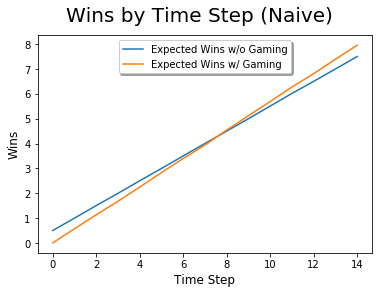

In [26]:
wins = [0.5, 0.999, 1.504, 1.996, 2.502, 2.997, 3.501, 4.004, 4.500, 4.999, 5.507, 6.015, 6.501, 6.998, 7.500]
t_wins = [0, 0.570, 1.134, 1.678, 2.245, 2.831, 3.399, 3.941, 4.544, 5.120, 5.688, 6.274, 6.811, 7.389, 7.954]
xes = [i for i in range(15)]
plt.plot(xes, wins, label= 'Expected Wins w/o Gaming')
plt.plot(xes, t_wins, label= 'Expected Wins w/ Gaming')
legend = plt.legend(loc='upper center', shadow=True, fontsize='medium')
plt.suptitle('Wins by Time Step (Naive)', fontsize=20)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.savefig('plot_for_time_naive.jpg')